In [1]:
#Observations
#I did my analysis based on the treatment with three drugs(Capomulin, Infubinol, Ketapril) and Placebo.
#1) Capomulin , proved to be most effective amongst the three. 
#It had a significant lower tumor volume over the 45 day Timepoint. And Ketapril seemed to doing worst.
#2) Capomulin drug proved to be effective in controlling Metastatic spread during the 45 day treatment. 
#Infubinol did a little better but again Ketapril proved to be not a good drug.
#3) Capomulin had a good mice survival rate, almost 84% of mice 
#survived during test with Capomulin and the other two drugs seemed to be doing worst than Placebo

In [2]:
%matplotlib notebook

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Clinical Trial and Mouse Drug Data files to load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_complete = pd.merge(clinical_trial_df, mouse_drug_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
trial_data_complete.head()

#My Analysis is based on the below four drugs
drug_names = ["Capomulin","Infubinol","Ketapril", "Placebo"]


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#Tumor Response data based on Drug, Timepoint and Tumor Volume(mm3)
tumor_respone_data = trial_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]
#Grouping on Drug and Timepoint
drug_timepoint_grp = tumor_respone_data.groupby(["Drug","Timepoint"])
#Obtaining the mean of the Tumor Volume after grouping
drug_mean = drug_timepoint_grp["Tumor Volume (mm3)"].mean()

# Convert to DataFrame and Store the Mean Tumor Volume Data
#@question do i need to reset_index is there a way to plot without doing this?
tumor_response_mean_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_mean}).reset_index()

# Preview DataFrame
tumor_response_mean_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
#Using the same groupby created above for mean
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_standard_error = drug_timepoint_grp["Tumor Volume (mm3)"].sem()

# Convert to DataFrame and Store the Standard Error of Tumor Volumes
tumor_response_sterr_df = pd.DataFrame({"Tumor Volume (mm3)" : drug_standard_error}).reset_index()
# Preview DataFrame
tumor_response_sterr_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
#Pivoting the table to better plot.
tumor_response_mean_df = tumor_response_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_response_sterr_df = tumor_response_sterr_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked

tumor_response_sterr_df
tumor_response_mean_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
#Data for X axis
timepoints = tumor_response_mean_df.index

#Data for Y axis
meanCapomulin = tumor_response_mean_df.iloc[0:,0]
semCapomulin = tumor_response_sterr_df.iloc[0:,0]

meanInfubinol = tumor_response_mean_df.iloc[0:,2]
semInfubinol = tumor_response_sterr_df.iloc[0:,2]

meanKetapril = tumor_response_mean_df.iloc[0:,3]
semKetapril = tumor_response_sterr_df.iloc[0:,3]

meanPlacebo = tumor_response_mean_df.iloc[0:,5]
semPlacebo = tumor_response_sterr_df.iloc[0:,5]







<IPython.core.display.Javascript object>


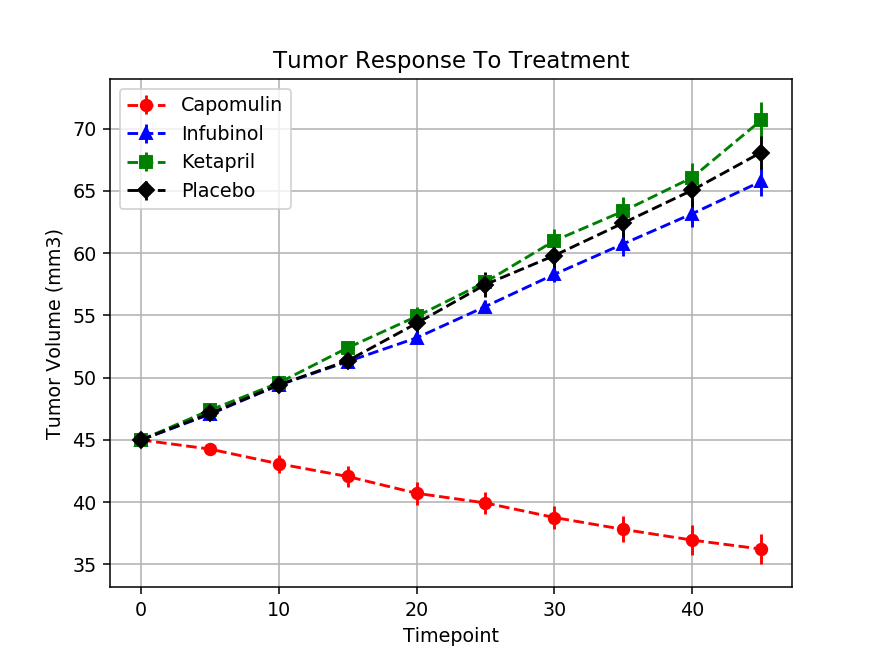

In [9]:
# Show the Figure
fig = plt.figure() 
#plt.figure(figsize=(5,5))
# Generate the Plot (with Error Bars)
#Retireving Plotting Data
plt.errorbar(timepoints, meanCapomulin, yerr=semCapomulin, marker="o",label='Capomulin',linestyle="dashed", color="red")

plt.errorbar(timepoints, meanInfubinol, yerr=semInfubinol, marker="^",label='Infubinol',linestyle="dashed", color="blue")

plt.errorbar(timepoints, meanKetapril, yerr=semKetapril,marker="s",label='Ketapril',linestyle="dashed", color="green")

plt.errorbar(timepoints, meanPlacebo, yerr=semPlacebo, marker="D",label='Placebo',linestyle="dashed", color="black")
#plt.xlim(0,50)
#plt.ylim(0,75)
plt.title("Tumor Response To Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc='best')
plt.grid()
plt.show()

# Save the Figure

plt.savefig("Images/Tumor_Response_To_Treatment_plot.png")

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Metastatic Sites Response data based on Drug, Timepoint and Metastatic Sites
met_respone_data = trial_data_complete[["Drug","Timepoint","Metastatic Sites"]]
#Grouping data on Drug and Timepoint
met_response_grp = met_respone_data.groupby(["Drug","Timepoint"])
#Calculate the mean on Metastatic Sites
met_mean = met_response_grp["Metastatic Sites"].mean()
# Convert to DataFrame to Store the Mean Met. Site Data
met_response_mean_df = pd.DataFrame({"Metastatic Sites" : met_mean}).reset_index()
# Preview DataFrame
met_response_mean_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
#using the same data groupby object used earlier

#Calculate the Stderr on Metastatic Sites
met_stderr = met_response_grp["Metastatic Sites"].sem()

# Convert to DataFrame and Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_response_stderr_df = pd.DataFrame({"Metastatic Sites" : met_stderr}).reset_index()
# Preview DataFrame
met_response_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_response_mean_df = met_response_mean_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
met_response_stderr_df = met_response_stderr_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
met_response_mean_df
met_response_stderr_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [13]:
#Retireving Plotting Data
#Data for X axis
timepoints1 = met_response_mean_df.index

#Data for Y axis
mean_met_Capomulin = met_response_mean_df.iloc[0:,0]
sem_met_Capomulin = met_response_stderr_df.iloc[0:,0]

mean_met_Infubinol = met_response_mean_df.iloc[0:,2]
sem_met_Infubinol = met_response_stderr_df.iloc[0:,2]

mean_met_Ketapril = met_response_mean_df.iloc[0:,3]
sem_met_Ketapril = met_response_stderr_df.iloc[0:,3]

mean_met_Placebo = met_response_mean_df.iloc[0:,5]
sem_met_Placebo = met_response_stderr_df.iloc[0:,5]

<IPython.core.display.Javascript object>


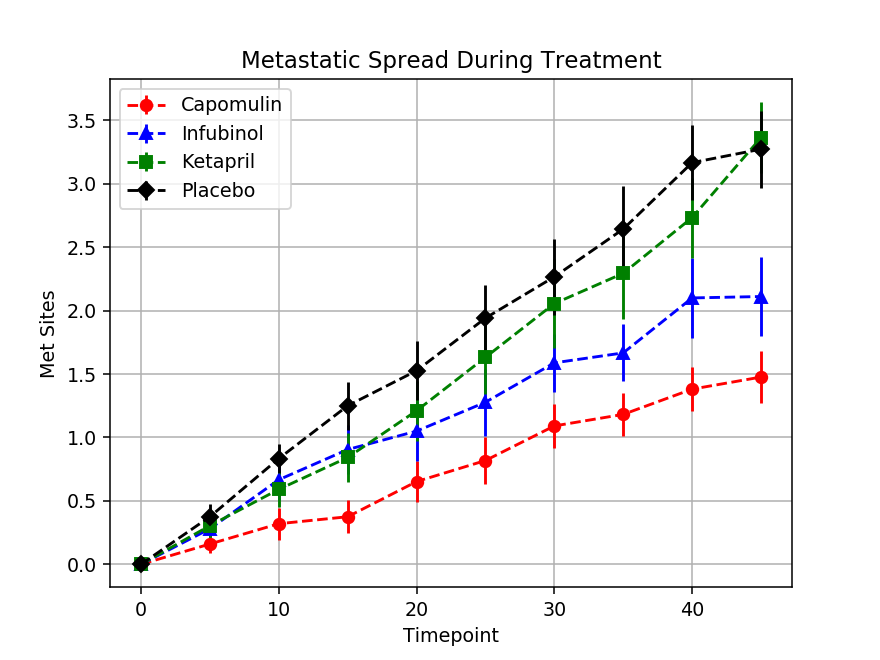

In [14]:
# Show the Figure
fig = plt.figure() 
#plt.figure(figsize=(5,5))
# Generate the Plot (with Error Bars)
plt.errorbar(timepoints1, mean_met_Capomulin, yerr=sem_met_Capomulin, marker="o",label='Capomulin',linestyle="dashed", color="red")
plt.errorbar(timepoints1, mean_met_Infubinol, yerr=sem_met_Infubinol, marker="^",label='Infubinol',linestyle="dashed", color="blue")
plt.errorbar(timepoints1, mean_met_Ketapril, yerr=sem_met_Ketapril, marker="s",label='Ketapril',linestyle="dashed", color="green")
plt.errorbar(timepoints1, mean_met_Placebo, yerr=sem_met_Placebo, marker="D",label='Placebo',linestyle="dashed", color="black")


#plt.xlim(0,50)
#plt.ylim(0,75)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Met Sites")

plt.legend(loc='best')
plt.grid()
plt.show()
#Save the Figure
plt.savefig("Images/Metastatic_Spread_During_Treatment_plot.png")

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data = trial_data_complete[["Drug","Timepoint","Mouse ID"]]

mice_data_grp = mice_data.groupby(["Drug","Timepoint"])
mice_data_grp.head()
mice_survival = mice_data_grp["Mouse ID"].count()
# Convert to DataFrame
mice_survival_count_df = pd.DataFrame({"Mouse Count" : mice_survival}).reset_index()
mice_init_count = 25
#miceDrg1 = mice_survival_count_df.loc[mice_survival_count_df["Drug"] == "Capomulin", :]
#miceDrg1Intcount = miceDrg1.iloc[0,2]
mice_survival_count_df["Survival"] = mice_survival_count_df["Mouse Count"]*100/mice_init_count
# Preview DataFrame
mice_survival_count_df.head()







,Drug,Timepoint,Mouse Count,Survival
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_count_df = mice_survival_count_df.pivot(index="Timepoint", columns="Drug", values="Survival")

# Preview the Data Frame
mice_survival_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


In [17]:
#Retireving Plotting Data
#Data for X axis
timepoints2 = mice_survival_count_df.index
#Data for Y axis
mice_survival_Capomulin = mice_survival_count_df.iloc[0:,0]

mice_survival_Placebo = mice_survival_count_df.iloc[0:,5]

mice_survival_Infubinol = mice_survival_count_df.iloc[0:,2]

mice_survival_Ketapril = mice_survival_count_df.iloc[0:,3]

#len(timepoints2)
#len(mice_survival_Capomulin)
#timepoints2


<IPython.core.display.Javascript object>


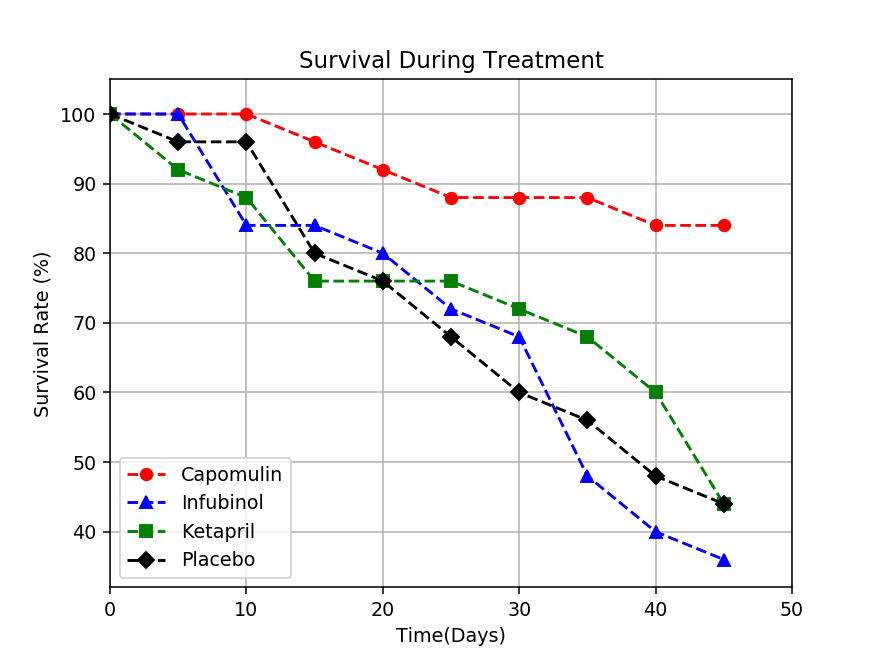

In [18]:
# Generate the Plot (Accounting for percentages)
fig = plt.figure() 
#plt.figure(figsize=(5,5))
plt.plot(timepoints2, mice_survival_Capomulin, marker="o",label='Capomulin',linestyle="dashed", color="red")
plt.plot(timepoints2, mice_survival_Infubinol, marker="^",label='Infubinol',linestyle="dashed", color="blue")
plt.plot(timepoints2, mice_survival_Ketapril, marker="s",label='Ketapril',linestyle="dashed", color="green")
plt.plot(timepoints2, mice_survival_Placebo, marker="D",label='Placebo',linestyle="dashed", color="black")

plt.xlim(0,50)
plt.ylim(32,105)

plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")

plt.legend(loc='best')
plt.grid()

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("Images/Survival_During_Treatment_plot.png")

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
# For each drug take the first timepoint and the last timepoint (0 and 45)
first_timepoint = timepoints[0]
last_timepoint = timepoints[len(timepoints)-1]
#print(first_timepoint)
#print(last_timepoint)
# Store all Relevant Percent Changes into a List
#Make a list to hold survival percentage for each drug
drug_percent = []
#Formula used is from the Data frame that is holding data for Tumor Volume for each drug
#Pick for each drug the tumor volume for the 45th day time point and 0th day time point
#tumor vol 45th day- tumor vol 0th day/tumor vol 0th day

drug_percent.append((tumor_response_mean_df["Capomulin"][last_timepoint] - tumor_response_mean_df["Capomulin"][first_timepoint])/ tumor_response_mean_df["Capomulin"][first_timepoint])
drug_percent.append((tumor_response_mean_df["Ketapril"][last_timepoint] - tumor_response_mean_df["Ketapril"][first_timepoint])/ tumor_response_mean_df["Ketapril"][first_timepoint])
drug_percent.append((tumor_response_mean_df["Infubinol"][last_timepoint] - tumor_response_mean_df["Infubinol"][first_timepoint])/ tumor_response_mean_df["Infubinol"][first_timepoint])
drug_percent.append((tumor_response_mean_df["Placebo"][last_timepoint] - tumor_response_mean_df["Placebo"][first_timepoint])/ tumor_response_mean_df["Placebo"][first_timepoint])

#Add the Drug Survival Percentage in a Dataframe
drug_summary_df = pd.DataFrame({"Drug": drug_names, "Survival_Percentage": drug_percent })
drug_summary_df["Survival_Percentage"] = drug_summary_df["Survival_Percentage"]*100
drug_summary_df



,Drug,Survival_Percentage
0,Capomulin,-19.475303
1,Infubinol,57.028795
2,Ketapril,46.123472
3,Placebo,51.297960


<IPython.core.display.Javascript object>


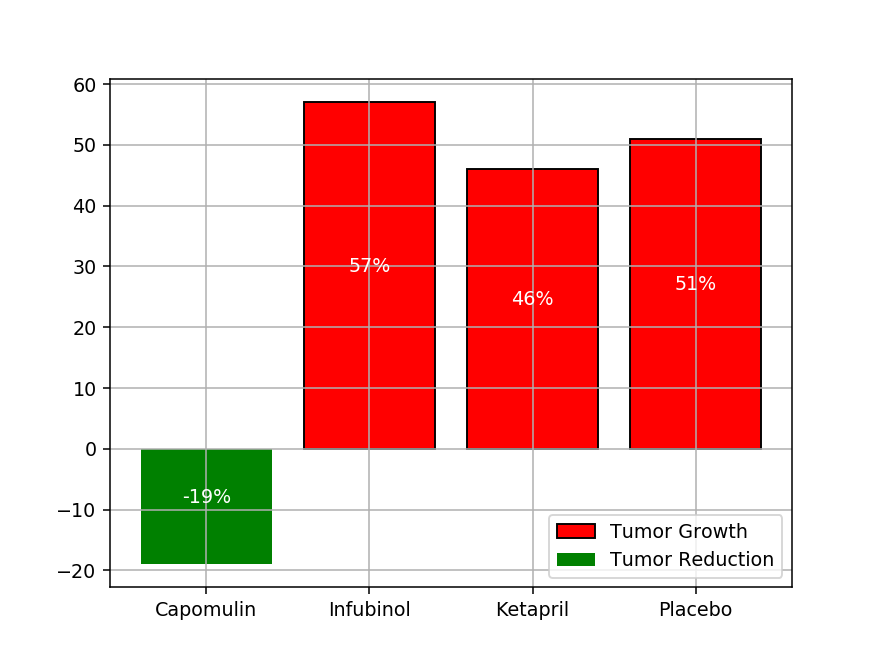

In [20]:
#Plotting for X and Y axis
x_axis = np.arange(0,4,1)
y_axis = drug_summary_df["Survival_Percentage"].astype(int)

fig, ax = plt.subplots()
# Splice the data between passing and failing drugs
pass_drug = y_axis >= 0
fail_drug = y_axis < 0

# Orient widths. Add labels, tick marks, etc. 
passlabel = ax.bar(x_axis[pass_drug], y_axis[pass_drug], color = 'red',edgecolor='black')
faillabel = ax.bar(x_axis[fail_drug], y_axis[fail_drug], color = 'green')
ax.set_xticks(x_axis)
ax.set_xticklabels(drug_names)
# legend for the red vs. green coloring
ax.legend((passlabel[0], faillabel[0]), ('Tumor Growth', 'Tumor Reduction'), loc="best")

# Use functions to label the percentages of changes
def autolabel(rects):
    """Attach a text label in the middle of each bar in *rects*, displaying Tumor Percentage."""
    for rect in rects:
        height = rect.get_height()
        height_format = "{0:.0f}%".format(rect.get_height())  # format as a percentage for display
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height, height_format, ha='center', va='bottom', color="white")


# Call functions to implement the function calls

autolabel(passlabel)
autolabel(faillabel)

ax.grid()
# Show the Figure
fig.show()

# Save the Figure
plt.savefig("Images/TumorChange_45Day_Treamtment_plot.png")
